# Advanced Coding Final Project

Written by Jiyun Tsai  
Data imported as of November 22nd, 2022

## Import Data

In [1]:
# Import data using pandas

import pandas as pd
import requests

In [2]:
# pip install sodapy

In [3]:
# Get API code instructions from (https://dev.socrata.com/foundry/data.sfgov.org/ab4h-6ztd)

# import pandas as pd
# from sodapy import Socrata


# client = Socrata("data.sfgov.org",
#                  "UBJcOCUaACnecZ7XJXpUT4tiG",
#                  username="jiyun_tsai@berkeley.edu",
#                  password="Password1022!")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
# results = client.get("ab4h-6ztd", limit="") ## how to get full data without limits?

# Convert to pandas DataFrame
# citation = pd.DataFrame.from_records(results)

In [4]:
# Read the file into Python
url = 'https://data.sfgov.org/api/views/ab4h-6ztd/rows.csv?accessType=DOWNLOAD'
r = requests.get(url, allow_redirects=False)

# Write the content of the request into a file called 'parking_citation.csv'
open('parking_citation.csv', 'wb').write(r.content)

2792377159

In [5]:
# Import this .csv file to dataframe named "citation"
citation = pd.read_csv('parking_citation.csv')

In [6]:
citation

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,771857995,10/27/2009 03:36:00 PM,T32A.1,TWAWY ZN#1,669 MISSION ST,CA,6ANP484,83.0,10/27/2009 12:00:00 AM,POINT (-122.40131583199997 37.78670342300006),32.0,32.0,1.0,10.0,8.0
1,771104246,09/14/2009 11:05:00 AM,V5204A,REG TABS,7 GROVE ST,CA,5FEK647,63.0,09/14/2009 12:00:00 AM,POINT (-122.41511664599994 37.77876024500006),21.0,21.0,5.0,10.0,36.0
2,770561131,09/10/2009 03:30:00 PM,T202,PRK METER,2851 24TH ST,CA,6DEG966,53.0,09/10/2009 12:00:00 AM,POINT (-122.40919778399996 37.752743407000025),53.0,53.0,3.0,2.0,20.0
3,770024076,09/07/2009 03:21:00 PM,T202,PRK METER,417 BAY ST,CA,6DKY758,53.0,09/07/2009 12:00:00 AM,POINT (-122.41413599899994 37.80540600300003),106.0,106.0,6.0,3.0,23.0
4,770025093,09/09/2009 01:23:00 PM,T58A,BLK WHEELS,136 LAWTON ST,CA,4JTL645,48.0,09/09/2009 12:00:00 AM,POINT (-122.46446999799997 37.75869600400006),109.0,109.0,10.0,8.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19033406,957032403,11/08/2022 08:52:00 AM,TRC7.2.22,STR CLEAN,2501 25TH AVE,CA,7TRV758,87.0,11/20/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
19033407,957069643,11/09/2022 01:20:00 PM,V5200,NO PLATES,2417 CLAY ST,CA,8AZF222,121.0,11/21/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
19033408,957026814,11/09/2022 07:10:00 AM,TRC7.2.22,STR CLEAN,899 TURK ST,FL,23AUUE,87.0,11/21/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
19033409,PD32608030,10/26/2022 01:52:00 PM,TRC7.2.42,RESTRICTED,LARKIN STREET/TURK STREET,CA,8SMY175,108.0,11/21/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
citation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19033411 entries, 0 to 19033410
Data columns (total 15 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Citation Number               object 
 1   Citation Issued DateTime      object 
 2   Violation                     object 
 3   Violation Description         object 
 4   Citation Location             object 
 5   Vehicle Plate State           object 
 6   Vehicle Plate                 object 
 7   Fine Amount                   float64
 8   Date Added                    object 
 9   geom                          object 
 10  Neighborhoods                 float64
 11  SF Find Neighborhoods         float64
 12  Current Police Districts      float64
 13  Current Supervisor Districts  float64
 14  Analysis Neighborhoods        float64
dtypes: float64(6), object(9)
memory usage: 2.1+ GB


In [8]:
# See 'Violation' types
citation['Violation'].value_counts()

TRC7.2.22     4738187
T37C          2397076
TRC7.2.23B    1315246
T202          1271179
TRC7.2.20     1125168
               ...   
V21107.8A           1
GO1.H.4             1
T315D               1
000181              1
T32.6.7             1
Name: Violation, Length: 305, dtype: int64

## Street Cleaning Data in 5 Years (2018-2022)
For street cleaning, the dataframe contains two codes in 'Violation' column: TRC7.2.22 and T37C, all data after 2018 use TRC7.2.22  
Filter dataframe before cleaning data for the whole dataframe is too large (19M rows of data)

*code description and more info could be found [here](https://www.sfmta.com/sites/default/files/reports-and-documents/2022/10/fy_2023_fees_and_fines_effective_7.1.22_1.pdf)

### Filter and Clean

In [9]:
# Filter data of street cleaning 'TRC7.2.22' 
citation_st_cleaning = citation[citation['Violation']== 'TRC7.2.22'].copy()

In [10]:
# Convert dtype for 'Citation Issued DateTime'
citation_st_cleaning['Citation Issued DateTime'] = pd.to_datetime(citation_st_cleaning['Citation Issued DateTime'])

In [11]:
# Filter data from 2018 to 2022 from citation_st_cleaning dataframe
citation_st_cleaning_5yr = citation_st_cleaning[citation_st_cleaning['Citation Issued DateTime'] >= '2018-01-01'].copy()

In [12]:
# Sort data by date and time
citation_st_cleaning_5yr.sort_values(by=['Citation Issued DateTime'])

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
13845718,892597786,2018-01-02 00:03:00,TRC7.2.22,STR CLEAN,7 04TH ST,CA,8AGE461,73.0,10/15/2021 12:00:00 AM,POINT (-122.46585481399995 37.788244665000036),4.0,4.0,8.0,6.0,11.0
13888628,892597790,2018-01-02 00:08:00,TRC7.2.22,STR CLEAN,869 FOLSOM ST,CA,6TZE100,73.0,04/30/2020 12:00:00 AM,POINT (-122.40263889499994 37.78079616600007),32.0,32.0,1.0,10.0,34.0
13853286,892536632,2018-01-02 00:08:00,TRC7.2.22,STR CLEAN,333 08TH ST,CA,7XSH956,73.0,09/24/2018 12:00:00 AM,POINT (-122.03654390799994 38.24835797800006),NaN,NaN,NaN,NaN,NaN
13862480,892597801,2018-01-02 00:09:00,TRC7.2.22,STR CLEAN,839 FOLSOM ST,CA,7XBP248,73.0,06/16/2018 12:00:00 AM,POINT (-122.40196506399997 37.781329424000035),32.0,32.0,1.0,10.0,34.0
13638756,892257855,2018-01-02 00:10:00,TRC7.2.22,STR CLEAN,225 TOWNSEND ST,CA,6CWY869,73.0,04/12/2021 12:00:00 AM,POINT (-122.39345305299997 37.77822802800006),34.0,34.0,1.0,10.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349901,957101110,2022-11-15 13:16:00,TRC7.2.22,STR CLEAN,3825 KIRKHAM ST,WA,BND8075,87.0,11/21/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2369012,957241821,2022-11-15 13:18:00,TRC7.2.22,STR CLEAN,3701 KIRKHAM ST,AZ,BZE2196,87.0,11/21/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2368680,957147752,2022-11-15 13:19:00,TRC7.2.22,STR CLEAN,1930 SILVER AVE,CA,86417C2,87.0,11/21/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2348361,957243781,2022-11-15 13:22:00,TRC7.2.22,STR CLEAN,71 ROCKAWAY AVE,ME,2419XC,87.0,11/21/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check duplicates
citation_st_cleaning_5yr.nunique()

Citation Number                 2374506
Citation Issued DateTime         619450
Violation                             1
Violation Description                 1
Citation Location                599594
Vehicle Plate State                 100
Vehicle Plate                    969540
Fine Amount                          13
Date Added                         1240
geom                             245357
Neighborhoods                       117
SF Find Neighborhoods               117
Current Police Districts             10
Current Supervisor Districts         11
Analysis Neighborhoods               41
dtype: int64

In [ ]:
len(citation_st_cleaning_5yr) ## there are no duplicated rows for 'Citation Number'

2374506

In [ ]:
# Export filtered and cleaned dataframe as .csv for future analysis, data as of November 22, 2022
citation_st_cleaning_5yr.to_csv('citation_st_cleaning_5yr.csv', index=False)

Cleaned data (.csv file) can be accessed at [Google Drive](https://drive.google.com/drive/folders/1SJ0jPphZWaPy7h72a2X3uj4rI_nGH8hH?usp=share_link)

### Analysis and Visualizing

In [ ]:
pip install altair

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import altair as alt

In [ ]:
# Import citation_st_cleaning_5yr.csv
st_cleaning_5yr = pd.read_csv('citation_st_cleaning_5yr.csv',
                              dtype={'Citation Number': object} ,
                              parse_dates=['Citation Issued DateTime'])

In [ ]:
st_cleaning_5yr

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,949367440,2022-03-23 02:33:00,TRC7.2.22,STR CLEAN,720 TURK ST,CA,8U09234,84.0,11/16/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
1,949375335,2022-03-24 09:30:00,TRC7.2.22,STR CLEAN,19 RIVAS AVE,CA,8GOA162,84.0,11/16/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2,949395613,2022-03-21 13:05:00,TRC7.2.22,STR CLEAN,1405 BAKER ST,CA,5JZT981,84.0,11/16/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
3,949411481,2022-03-29 00:15:00,TRC7.2.22,STR CLEAN,420 NATOMA ST,CA,8DEJ983,84.0,11/16/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
4,949412855,2022-03-22 12:25:00,TRC7.2.22,STR CLEAN,717 WALLER ST,CA,6GOF707,84.0,11/16/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374501,957009465,2022-11-08 07:24:00,TRC7.2.22,STR CLEAN,6220 GEARY BLVD,CA,7GWE932,87.0,11/15/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2374502,957033033,2022-11-09 09:18:00,TRC7.2.22,STR CLEAN,2100 LINCOLN WAY,CA,8MXY663,87.0,11/15/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2374503,957011543,2022-11-08 09:05:00,TRC7.2.22,STR CLEAN,315 FUNSTON AVE,CA,8UXY385,87.0,11/19/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN
2374504,957032403,2022-11-08 08:52:00,TRC7.2.22,STR CLEAN,2501 25TH AVE,CA,7TRV758,87.0,11/20/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
st_cleaning_5yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374506 entries, 0 to 2374505
Data columns (total 15 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Citation Number               object        
 1   Citation Issued DateTime      datetime64[ns]
 2   Violation                     object        
 3   Violation Description         object        
 4   Citation Location             object        
 5   Vehicle Plate State           object        
 6   Vehicle Plate                 object        
 7   Fine Amount                   float64       
 8   Date Added                    object        
 9   geom                          object        
 10  Neighborhoods                 float64       
 11  SF Find Neighborhoods         float64       
 12  Current Police Districts      float64       
 13  Current Supervisor Districts  float64       
 14  Analysis Neighborhoods        float64       
dtypes: datetime64[ns](1), float64(6)

In [ ]:
# Extract year from 'Citation Issued DateTime'
st_cleaning_5yr['Issued Year'] = pd.DatetimeIndex(st_cleaning_5yr['Citation Issued DateTime']).year

In [ ]:
# Check new column created, sorted by issued date and reset the index
st_cleaning_5yr.sort_values(['Citation Issued DateTime']).reset_index(drop=True)

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Issued Year
0,892597786,2018-01-02 00:03:00,TRC7.2.22,STR CLEAN,7 04TH ST,CA,8AGE461,73.0,10/15/2021 12:00:00 AM,POINT (-122.46585481399995 37.788244665000036),4.0,4.0,8.0,6.0,11.0,2018
1,892597790,2018-01-02 00:08:00,TRC7.2.22,STR CLEAN,869 FOLSOM ST,CA,6TZE100,73.0,04/30/2020 12:00:00 AM,POINT (-122.40263889499994 37.78079616600007),32.0,32.0,1.0,10.0,34.0,2018
2,892536632,2018-01-02 00:08:00,TRC7.2.22,STR CLEAN,333 08TH ST,CA,7XSH956,73.0,09/24/2018 12:00:00 AM,POINT (-122.03654390799994 38.24835797800006),NaN,NaN,NaN,NaN,NaN,2018
3,892597801,2018-01-02 00:09:00,TRC7.2.22,STR CLEAN,839 FOLSOM ST,CA,7XBP248,73.0,06/16/2018 12:00:00 AM,POINT (-122.40196506399997 37.781329424000035),32.0,32.0,1.0,10.0,34.0,2018
4,892257855,2018-01-02 00:10:00,TRC7.2.22,STR CLEAN,225 TOWNSEND ST,CA,6CWY869,73.0,04/12/2021 12:00:00 AM,POINT (-122.39345305299997 37.77822802800006),34.0,34.0,1.0,10.0,4.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374501,957101110,2022-11-15 13:16:00,TRC7.2.22,STR CLEAN,3825 KIRKHAM ST,WA,BND8075,87.0,11/21/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2022
2374502,957241821,2022-11-15 13:18:00,TRC7.2.22,STR CLEAN,3701 KIRKHAM ST,AZ,BZE2196,87.0,11/21/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2022
2374503,957147752,2022-11-15 13:19:00,TRC7.2.22,STR CLEAN,1930 SILVER AVE,CA,86417C2,87.0,11/21/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2022
2374504,957243781,2022-11-15 13:22:00,TRC7.2.22,STR CLEAN,71 ROCKAWAY AVE,ME,2419XC,87.0,11/21/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,2022


#### How many street cleaning citations were given each year from 2018-2022?
Very much similar each year (year 2022 is not completed yet)

In [ ]:
# Count citation numbers by year (note: 'Issued Year' here is not a column)
st_cleaning_year_count = st_cleaning_5yr.groupby(['Issued Year']).count()
st_cleaning_year_count = st_cleaning_year_count[['Citation Number']].copy()
st_cleaning_year_count = st_cleaning_year_count.reset_index()
st_cleaning_year_count

,Issued Year,Citation Number
0,2018,518231
1,2019,491695
2,2020,392716
3,2021,533579
4,2022,438285


In [ ]:
# Visualize the table
alt.Chart(st_cleaning_year_count,
    width=400,
    height=200).mark_line(color='darkolivegreen').encode(
    x=alt.X('Issued Year:O', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('Citation Number',title='Citation Count') ## change format to 100K?
).properties(
    title='Street Cleaning Citation Count from 2018-2022'
)

alt.Chart(...)

#### Take closer look at citation count each month

In [63]:
st_cleaning_month_count = st_cleaning_5yr.groupby(pd.Grouper(key='Citation Issued DateTime', axis=0, freq='M')).count()[['Citation Number']].reset_index() ## still datetime
# st_cleaning_month_count['Issued Month'] = st_cleaning_month_count['Citation Issued DateTime'].dt.strftime('%b, %Y') ## this change my dtype to 'object'?
st_cleaning_month_count

,Citation Issued DateTime,Citation Number
0,2018-01-31,41850
1,2018-02-28,41716
2,2018-03-31,45534
3,2018-04-30,41777
4,2018-05-31,45374
5,2018-06-30,43792
6,2018-07-31,41732
7,2018-08-31,47519
8,2018-09-30,41123
9,2018-10-31,41943


In [64]:
# Visualize the table
alt.Chart(st_cleaning_month_count,
    width=800,
    height=200).mark_line(color='darkolivegreen').encode(
    x=alt.X('Citation Issued DateTime', title='Issued Month', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('Citation Number',title='Citation Count') ## change format to 100K?
).properties(
    title='Street Cleaning Citation Count by Month from 2018-2022'
)

alt.Chart(...)

In [67]:
# alt.renderers.enable('jupyterlab') ## not working?

RendererRegistry.enable('jupyterlab')

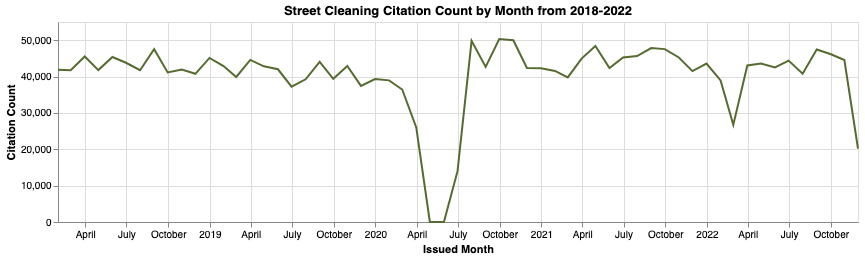

In [68]:
# Visualize the table
alt.Chart(st_cleaning_month_count,
    width=800,
    height=200).mark_line(color='darkolivegreen').encode(
    x=alt.X('Citation Issued DateTime', title='Issued Month', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('Citation Number',title='Citation Count') ## change format to 100K?
).properties(
    title='Street Cleaning Citation Count by Month from 2018-2022'
)

#### What about total fine each year for street cleaning violations?

#### What about months?

In [ ]:
# Reference: drop rows or columns: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
# syntax: DataFrame.drop(labels=None, *, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')